In [8]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ─── configuration ────────────────────────────────────────────────
dir_network = "../../artificial_networks"
graph_name  = "/ER_N100_d5_seed102"  # name of the network (without .csv)

# path to your influence‐maximization results CSV
lab_file    = "../../results/sigma0_ER_N100_d5_seed102.csv"
# ───────────────────────────────────────────────────────────────────

# build file‐paths for nodes and edges
nodes_file = dir_network + f"{graph_name}_nodes.csv"
edges_file = dir_network + f"{graph_name}_edges.csv"

# load the CSVs
nodes_df = pd.read_csv(nodes_file)    # if you need node attributes later
edges_df = pd.read_csv(edges_file)    # columns: edge, from_node, to_node
lab_df   = pd.read_csv(lab_file)      # columns: node_id, node_type, σ0, σ0_rounded, P_S

# index lab results by node_id for easy lookup
lab_df.set_index("node_id", inplace=True)

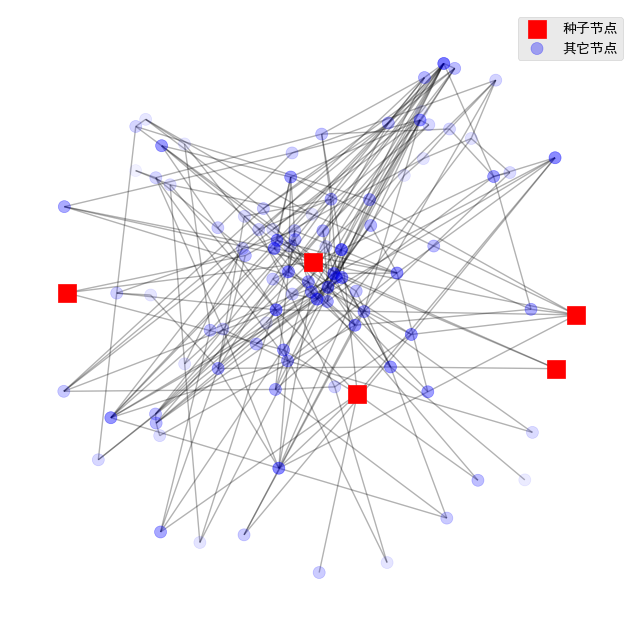

In [14]:
# create a directed graph (or nx.Graph() if undirected)
G = nx.DiGraph()
for _, row in edges_df.iterrows():
    G.add_edge(row["from_node"], row["to_node"])

# compute a layout
pos = nx.spring_layout(G, seed=510)

# extract seed vs non‐seed
is_seed   = lab_df["σ0_rounded"] == 1
seed_nodes  = lab_df.index[is_seed].tolist()
other_nodes = [n for n in G.nodes() if n not in seed_nodes]

# Set a style for better aesthetics
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']      # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False        # 正常显示负号
plt.rcParams['mathtext.fontset'] = 'stix'

# prepare plotting
plt.figure(figsize=(8, 8))
# draw edges lightly
nx.draw_networkx_edges(G, pos, alpha=0.3, arrows=False)

# draw seed nodes (square marker, full opacity)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=seed_nodes,
    node_shape="s",
    node_color="red",
    label="种子节点",
    node_size=150,
    alpha=1.0
)

# for non‐seed nodes, compute RGBA colors: here blue with alpha = (1 - P_S)
alphas = [(1.0 - lab_df.at[n, "P_S"]) for n in other_nodes]
colors = [(0.0, 0.0, 1.0, a) for a in alphas]  # (R, G, B, A)

# scatter‐draw the other nodes with per‐node transparency
xs = [pos[n][0] for n in other_nodes]
ys = [pos[n][1] for n in other_nodes]
plt.scatter(
    xs,
    ys,
    s=75,
    c=colors,
    marker="o",
    label="其它节点"
)

# optional: add labels or legend
plt.legend(scatterpoints=1)
plt.axis("off")
# plt.title(f"影响力最大化求解示例")
plt.savefig("fig/im_example.svg", dpi=300, bbox_inches="tight")
plt.show()
